In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, LassoCV, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

### Data Load

In [218]:
X_train = np.load('data/X_train_regression1.npy')
X_train_df = pd.DataFrame(X_train)
Y_train = np.load('data/y_train_regression1.npy')
Y_train_df = pd.DataFrame(Y_train)
X_test = np.load('data/X_test_regression1.npy')
X_test_df = pd.DataFrame(X_test)

### EDA

#### Data distribution analisys

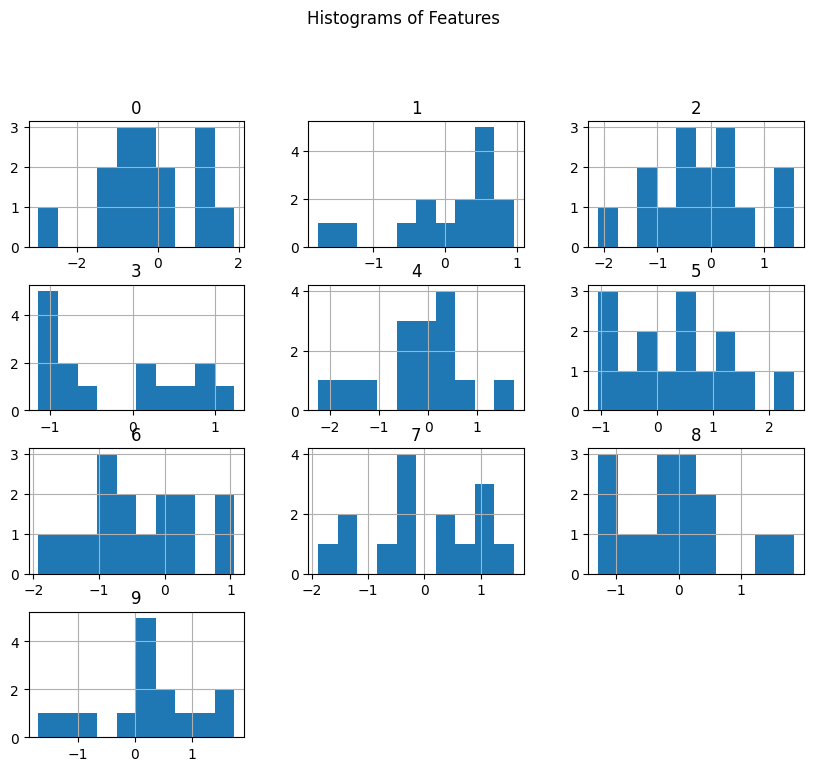

In [219]:
X_train_df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

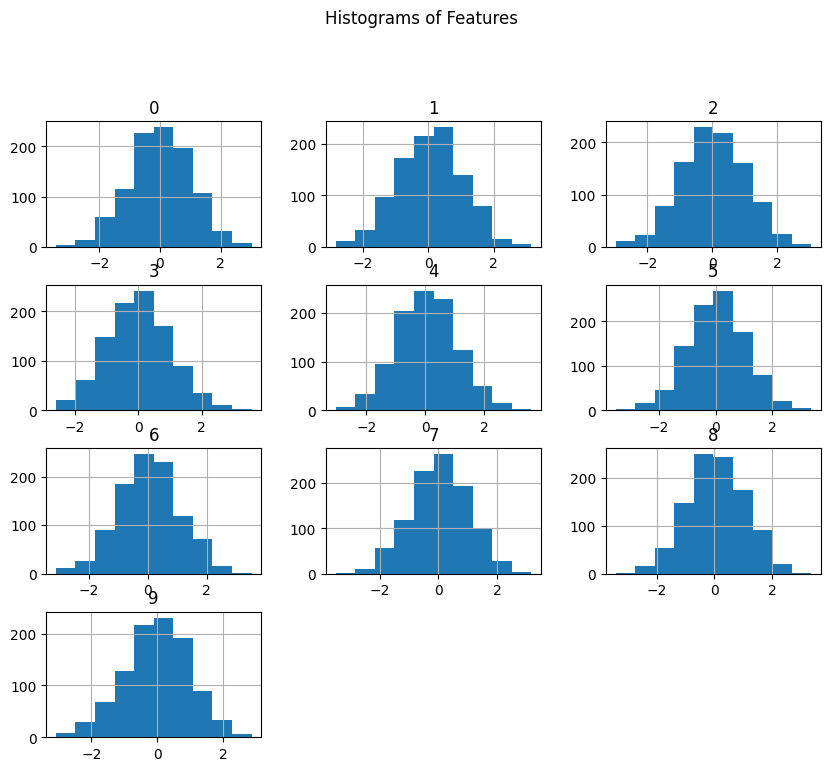

In [220]:
X_test_df.hist(bins=10, figsize=(10, 8))
plt.suptitle('Histograms of Features', y=1.02)
plt.show()

#### Data correlation analisys

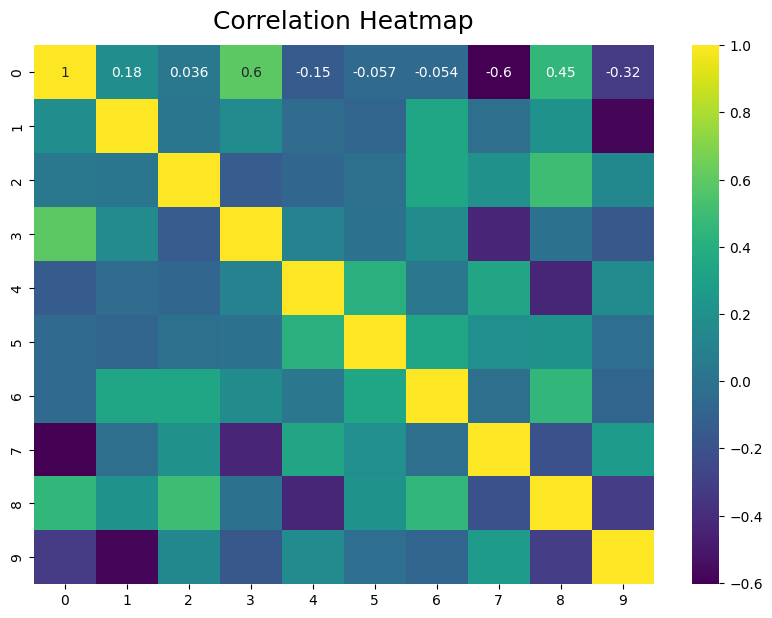

In [221]:
f = plt.figure(figsize=(10, 7))
X_train_Matrix = X_train_df.corr() 
heatmap = sns.heatmap(X_train_Matrix, annot=True, cmap="viridis") 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

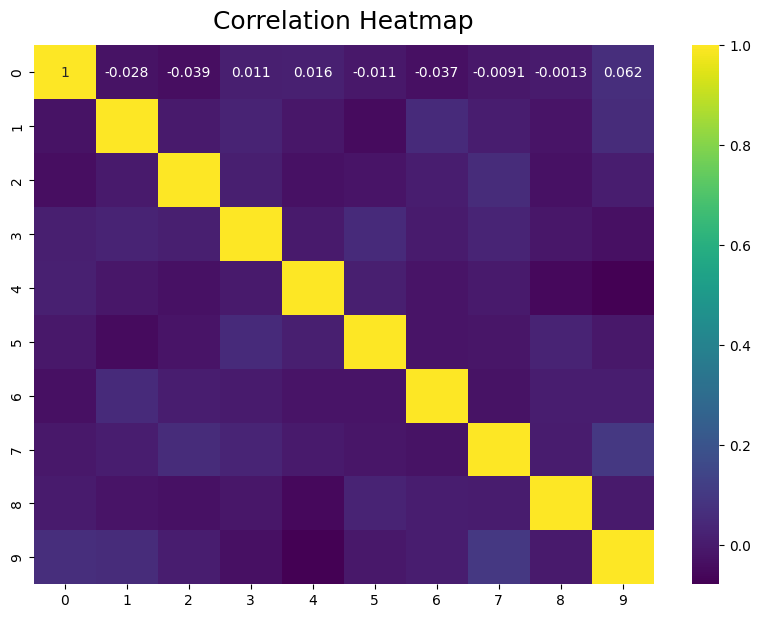

In [222]:
f = plt.figure(figsize=(10, 7))
X_test_Matrix = X_test_df.corr() 
heatmap = sns.heatmap(X_test_Matrix, annot=True, cmap="viridis") 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

Feature 0: 0.386178
Feature 1: 4.036347
Feature 2: 2.897527
Feature 3: 1.352134
Feature 4: 1.120926
Feature 5: 8.329494
Feature 6: 0.001137
Feature 7: 1.949557
Feature 8: 0.480275
Feature 9: 3.329743


/home/mserrao/dd/ml/project/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


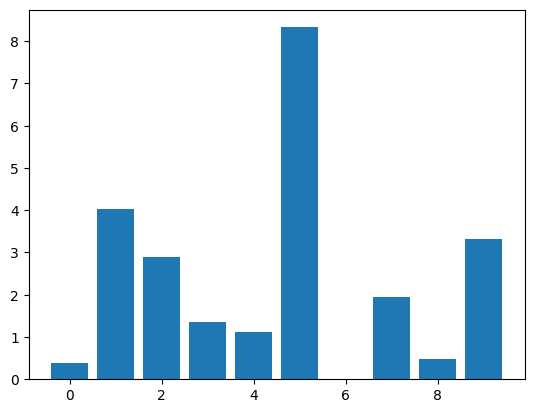

In [223]:
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=f_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train_df, Y_train_df, X_test_df)
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Preprocessing

#### Scaling

In [224]:
# standard_scaler = StandardScaler()
# X_train_df = pd.DataFrame(standard_scaler.fit_transform(X_train_df))
# X_test_df = pd.DataFrame(standard_scaler.transform(X_test_df))

In [225]:
minmax_scaler = MinMaxScaler()
X_train_df = pd.DataFrame(minmax_scaler.fit_transform(X_train_df))
X_test_df = pd.DataFrame(minmax_scaler.transform(X_test_df))

#### Feature Selection

Test dropping different dropped

In [226]:
features_to_drop =[] 
X_train_df = X_train_df.drop(columns=features_to_drop)
X_test_df = X_test_df.drop(columns=features_to_drop)
X_train_df

,0,1,2,3,4,5,6,7,8,9
0,0.812206,0.796322,0.473683,0.508716,0.403342,0.000000,0.000000,0.698791,0.424270,0.167765
1,0.554290,0.884520,0.645247,0.018666,0.210542,0.627787,1.000000,0.332107,1.000000,0.000000
2,0.495716,0.587246,0.796259,0.029380,0.465852,0.092365,0.511916,0.873422,0.582151,0.995654
3,0.589370,0.944318,0.482417,0.572688,1.000000,0.334913,0.612845,0.491319,0.010232,0.522368
4,0.323304,0.796819,0.215579,0.154764,0.530507,0.412205,0.349921,0.864566,0.000000,0.403670
5,0.458429,0.175437,0.000000,0.130166,0.602424,0.437405,0.347958,0.435259,0.066700,1.000000
6,1.000000,1.000000,0.658771,0.887608,0.749624,1.000000,0.902705,0.637271,0.834387,0.532438
7,0.000000,0.886162,0.360062,0.081533,0.548950,0.639198,0.498872,1.000000,0.144408,0.689802
8,0.812325,0.497114,0.437812,0.869731,0.619349,0.492010,0.270911,0.124108,0.229001,0.540459
9,0.362439,0.000000,0.998737,0.000000,0.680705,0.744485,0.360367,0.838913,0.432804,0.896321


#### PCA
Test different number of components

In [227]:
# pca_components = 10 
# pca = PCA(n_components=pca_components)

# X_train_df = pd.DataFrame(pca.fit_transform(X_train_df))
# X_test_df = pd.DataFrame(pca.transform(X_test_df))

# explained_variance_ratio = pca.explained_variance_ratio_

# for i, ratio in enumerate(explained_variance_ratio):
#     print(f"Explained Variance Ratio (Component {i + 1}): {ratio:.4f}")

# X_train_df

### Training

#### Lasso

In [228]:
# alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# lasso_cv = LassoCV(alphas=alphas, cv=None)
# lasso_cv.fit(X_train_df, Y_train)

# best_alpha = lasso_cv.alpha_
# print(best_alpha)

# model = Lasso(alpha=best_alpha)
# model.fit(X_train_df, Y_train)

#### Ridge

In [229]:
alphas = [ 0.001, 0.01, 0.1, 1.0, 10.0]

ridge_results = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_df, Y_train)
    
    pred = ridge.predict(X_train_df)
    
    mse = mean_squared_error(Y_train, pred)
    r2 = r2_score(Y_train, pred)
    
    ridge_results[alpha] = {'model': ridge, 'MSE': mse, 'R2': r2}
    
best_alpha = min(ridge_results, key=lambda alpha: ridge_results[alpha]['MSE'])
print(best_alpha)

print(ridge_results)
model = Ridge(alpha=best_alpha)
model.fit(X_train_df, Y_train)

0.001
{0.001: {'model': Ridge(alpha=0.001), 'MSE': 0.32912459029623603, 'R2': 0.9300433016134158}, 0.01: {'model': Ridge(alpha=0.01), 'MSE': 0.3311312755951283, 'R2': 0.929616772929901}, 0.1: {'model': Ridge(alpha=0.1), 'MSE': 0.4067177669082214, 'R2': 0.9135505732875988}, 1.0: {'model': Ridge(), 'MSE': 1.231886164393959, 'R2': 0.7381578545329984}, 10.0: {'model': Ridge(alpha=10.0), 'MSE': 3.573115602487131, 'R2': 0.24052052665343138}}


Ridge(alpha=0.001)

### Prediction

In [230]:
train_pred = model.predict(X_train_df)
test_pred = model.predict(X_test_df)

### Evaluation

In [231]:
mse = mean_squared_error(Y_train, train_pred)
sse = mse * len(Y_train)

r2 = r2_score(Y_train, train_pred)

print(f"Sum of Squared Errors (SSE): {sse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Sum of Squared Errors (SSE): 4.94
R-squared (R2) Score: 0.93
